In [1]:
import pydicom as py
import glob
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
data_dir = './data/dcm'

dcm_file_paths = glob.glob('{}/*.dcm'.format(data_dir))

In [3]:
dcm_files = [py.dcmread(filepath) for filepath in dcm_file_paths]

In [4]:
dcm_files[0]

Dataset.file_meta -------------------------------
(0002, 0000) File Meta Information Group Length  UL: 204
(0002, 0001) File Meta Information Version       OB: b'\x00\x01'
(0002, 0002) Media Storage SOP Class UID         UI: Secondary Capture Image Storage
(0002, 0003) Media Storage SOP Instance UID      UI: 1.3.6.1.4.1.11129.5.5.110503645592756492463169821050252582267888
(0002, 0010) Transfer Syntax UID                 UI: Implicit VR Little Endian
(0002, 0012) Implementation Class UID            UI: 1.2.826.0.1.3680043.8.498.1
(0002, 0013) Implementation Version Name         SH: 'PYDICOM 1.2.0'
-------------------------------------------------
(0008, 0016) SOP Class UID                       UI: Secondary Capture Image Storage
(0008, 0018) SOP Instance UID                    UI: 1.3.6.1.4.1.11129.5.5.110503645592756492463169821050252582267888
(0008, 0060) Modality                            CS: 'DX'
(0008, 1030) Study Description                   LO: 'No Finding'
(0010, 0020) Patien

In [5]:
data = []

for dcm_file in dcm_files:
    
    body_part_examined = dcm_file['BodyPartExamined'].value
    modality = dcm_file['Modality'].value
    
    patient_id = dcm_file['PatientID'].value
    patient_age = int(dcm_file['PatientAge'].value)
    patient_gender = dcm_file['PatientSex'].value
    finding_label = dcm_file['StudyDescription'].value
    
    rows = int(dcm_file['Rows'].value)
    columns = int(dcm_file['Columns'].value)
    
    pixel_data = dcm_file.pixel_array
    
    data.append([
        patient_id, patient_age, patient_gender, 
        modality, finding_label, body_part_examined, 
        rows, columns
    ])

In [6]:
df = pd.DataFrame(
    data, 
    columns = [
        'PatientID', 'PatientAge', 'PatientSex', 
        'Modality', 'Findings', 'Body Part Examined', 
        'Rows','Columns'])

In [7]:
df

,PatientID,PatientAge,PatientSex,Modality,Findings,Body Part Examined,Rows,Columns
0,2,81,M,DX,No Finding,RIBCAGE,1024,1024
1,2,81,M,CT,No Finding,CHEST,1024,1024
2,2,81,M,DX,No Finding,CHEST,1024,1024
3,1,58,M,DX,Cardiomegaly,CHEST,1024,1024
4,61,77,M,DX,Effusion,CHEST,1024,1024
5,2,81,M,DX,No Finding,CHEST,1024,1024


---
---
---

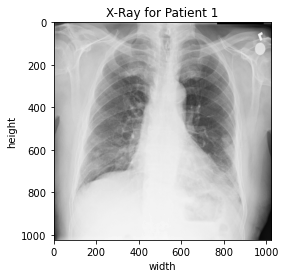

In [35]:
dcm = dcm_files[0]

plt.imshow(dcm.pixel_array,cmap='gray')

plt.xlabel('width')
plt.ylabel('height')

plt.title('X-Ray for Patient {}'.format(1))

plt.show()

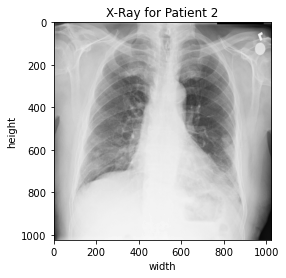

In [37]:
dcm_1 = dcm_files[1]

plt.imshow(dcm_1.pixel_array,cmap='gray')

plt.xlabel('width')
plt.ylabel('height')

plt.title('X-Ray for Patient {}'.format(2))

plt.show()

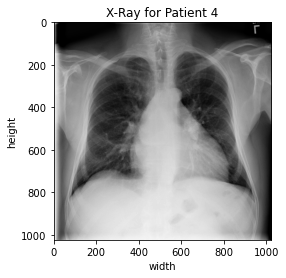

In [40]:
dcm_3 = dcm_files[3]

plt.imshow(dcm_3.pixel_array,cmap='gray')

plt.xlabel('width')
plt.ylabel('height')

plt.title('X-Ray for Patient {}'.format(4))

plt.show()

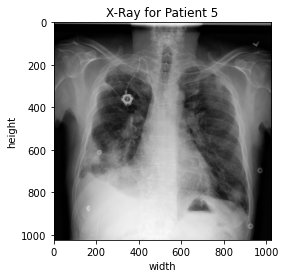

In [41]:
dcm_4 = dcm_files[4]

plt.imshow(dcm_4.pixel_array,cmap='gray')

plt.xlabel('width')
plt.ylabel('height')

plt.title('X-Ray for Patient {}'.format(5))

plt.show()

---
---

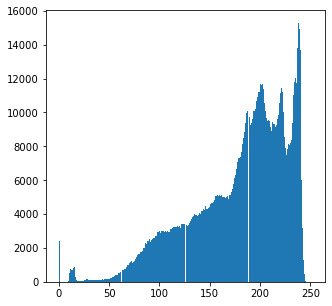

In [10]:
plt.figure(figsize=(5,5))
plt.hist(dcm.pixel_array.ravel(), bins = 256)

plt.show()

In [11]:
mean_intensity = np.mean(dcm.pixel_array)
std_intensity = np.std(dcm.pixel_array)

new_img = dcm.pixel_array.copy()
new_img = (new_img - mean_intensity)/std_intensity

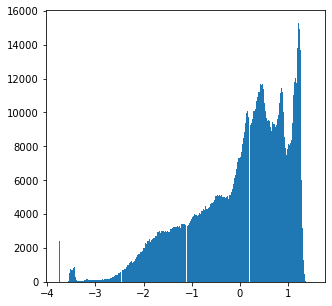

In [12]:
plt.figure(figsize=(5, 5))
plt.hist(new_img.ravel(), bins = 256)

plt.show()

---

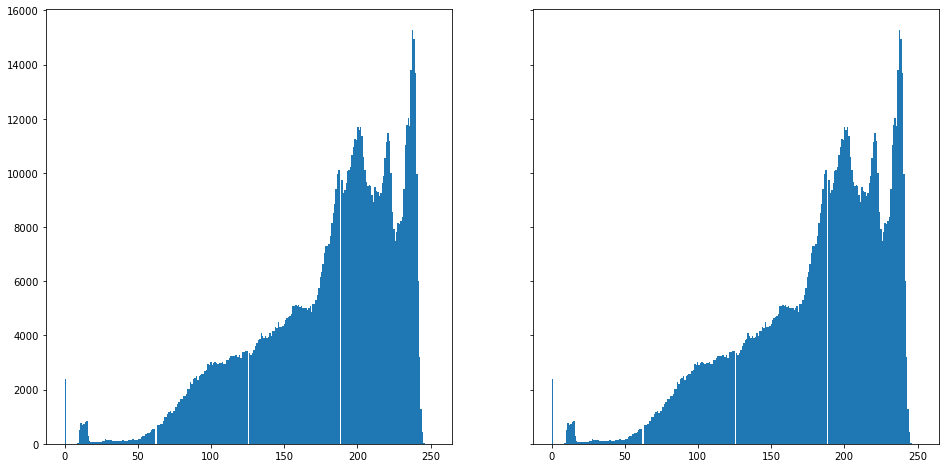

In [27]:
fig, axs = plt.subplots(1, 2, figsize=(16, 8), sharey=True)

axs[0].hist(dcm_files[0].pixel_array.ravel(), bins = 256)
axs[1].hist(dcm_files[1].pixel_array.ravel(), bins = 256)

plt.show()

In [14]:
df.iloc[[0, 1]]

,PatientID,PatientAge,PatientSex,Modality,Findings,Body Part Examined,Rows,Columns
0,2,81,M,DX,No Finding,RIBCAGE,1024,1024
1,2,81,M,CT,No Finding,CHEST,1024,1024


---

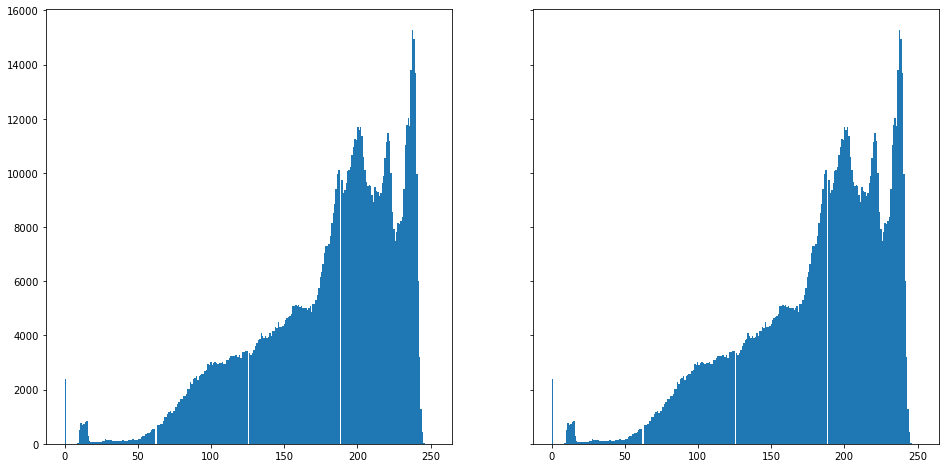

In [28]:
fig, axs = plt.subplots(1, 2, figsize=(16, 8), sharey=True)

axs[0].hist(dcm_files[0].pixel_array.ravel(), bins = 256)
axs[1].hist(dcm_files[2].pixel_array.ravel(), bins = 256)

plt.show()

In [16]:
df.iloc[[0, 2]]

,PatientID,PatientAge,PatientSex,Modality,Findings,Body Part Examined,Rows,Columns
0,2,81,M,DX,No Finding,RIBCAGE,1024,1024
2,2,81,M,DX,No Finding,CHEST,1024,1024


---

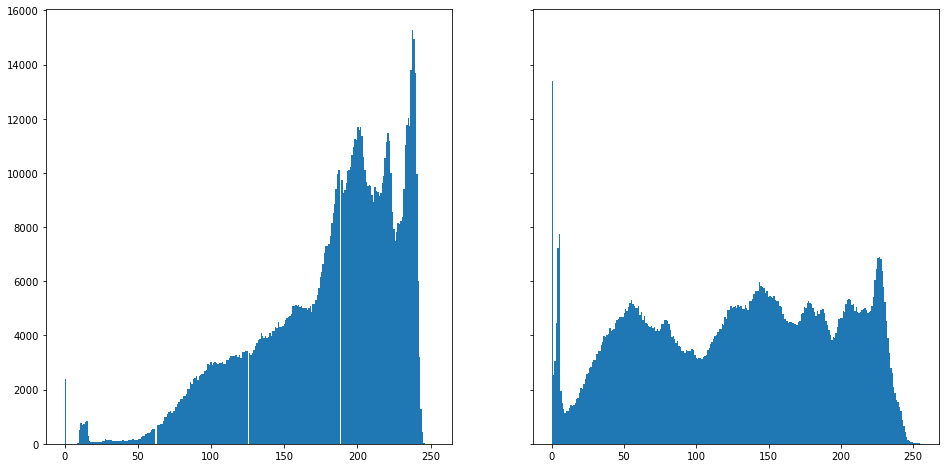

In [29]:
fig, axs = plt.subplots(1, 2, figsize=(16, 8), sharey=True)

axs[0].hist(dcm_files[0].pixel_array.ravel(), bins = 256)
axs[1].hist(dcm_files[3].pixel_array.ravel(), bins = 256)

plt.show()

In [18]:
df.iloc[[0, 3]]

,PatientID,PatientAge,PatientSex,Modality,Findings,Body Part Examined,Rows,Columns
0,2,81,M,DX,No Finding,RIBCAGE,1024,1024
3,1,58,M,DX,Cardiomegaly,CHEST,1024,1024


---

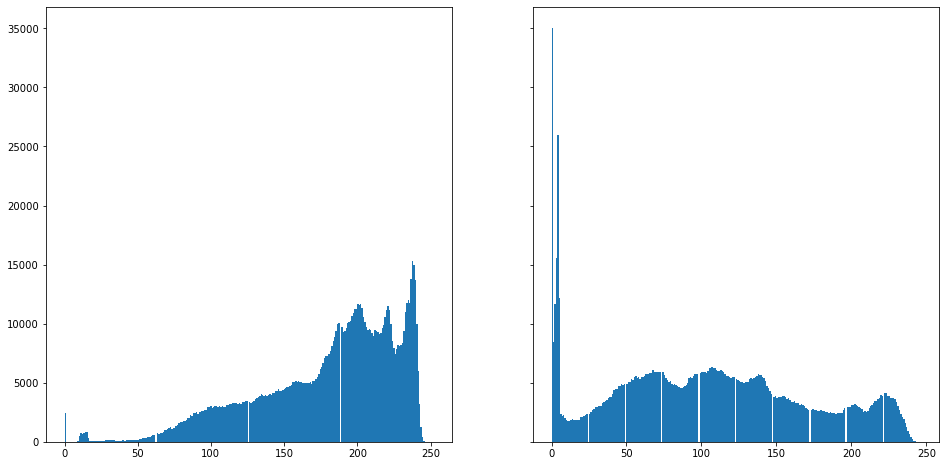

In [30]:
fig, axs = plt.subplots(1, 2, figsize=(16, 8), sharey=True)

axs[0].hist(dcm_files[0].pixel_array.ravel(), bins = 256)
axs[1].hist(dcm_files[4].pixel_array.ravel(), bins = 256)

plt.show()

In [20]:
df.iloc[[0, 4]]

,PatientID,PatientAge,PatientSex,Modality,Findings,Body Part Examined,Rows,Columns
0,2,81,M,DX,No Finding,RIBCAGE,1024,1024
4,61,77,M,DX,Effusion,CHEST,1024,1024


---

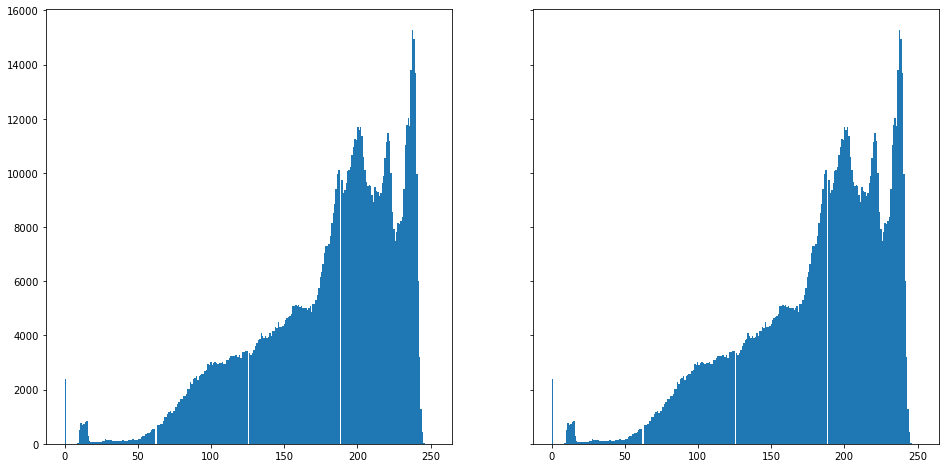

In [31]:
fig, axs = plt.subplots(1, 2, figsize=(16, 8), sharey=True)

axs[0].hist(dcm_files[0].pixel_array.ravel(), bins = 256)
axs[1].hist(dcm_files[5].pixel_array.ravel(), bins = 256)

plt.show()

In [22]:
df.iloc[[0, 5]]

,PatientID,PatientAge,PatientSex,Modality,Findings,Body Part Examined,Rows,Columns
0,2,81,M,DX,No Finding,RIBCAGE,1024,1024
5,2,81,M,DX,No Finding,CHEST,1024,1024


---

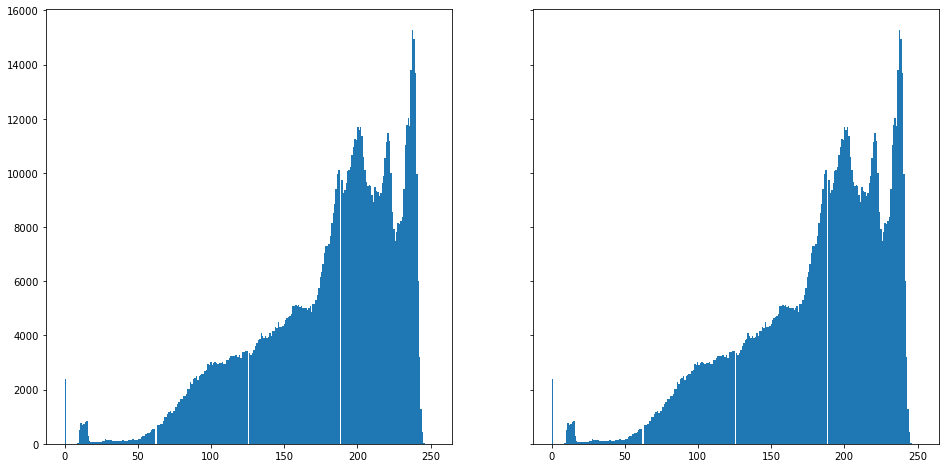

In [32]:
fig, axs = plt.subplots(1, 2, figsize=(16, 8), sharey=True)

axs[0].hist(dcm_files[1].pixel_array.ravel(), bins = 256)
axs[1].hist(dcm_files[2].pixel_array.ravel(), bins = 256)

plt.show()

In [24]:
df.iloc[[1, 2]]

,PatientID,PatientAge,PatientSex,Modality,Findings,Body Part Examined,Rows,Columns
1,2,81,M,CT,No Finding,CHEST,1024,1024
2,2,81,M,DX,No Finding,CHEST,1024,1024


---
---
---


---
---
---

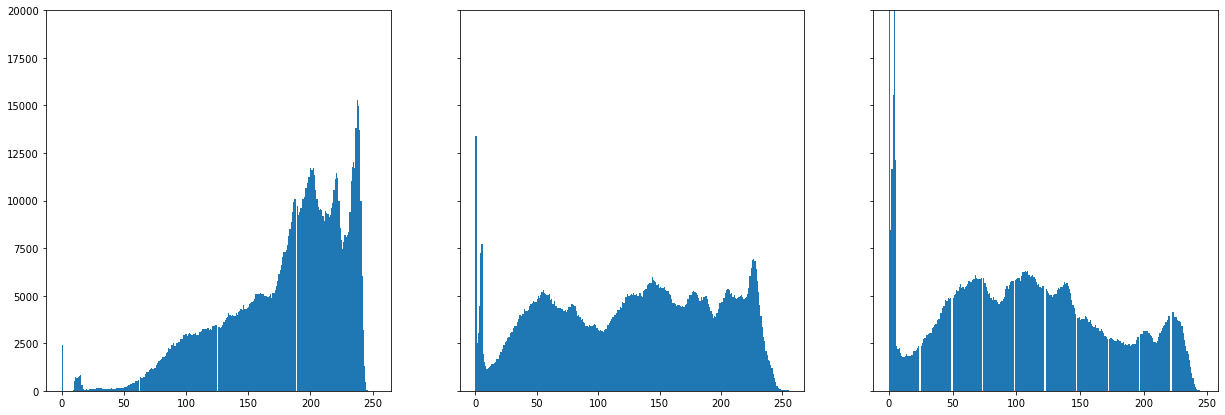

In [25]:
fig, axs = plt.subplots(1, 3, figsize=(21, 7), sharey=True)

axs[0].hist(dcm_files[1].pixel_array.ravel(), bins = 256)
axs[1].hist(dcm_files[3].pixel_array.ravel(), bins = 256)
axs[2].hist(dcm_files[4].pixel_array.ravel(), bins = 256)

plt.ylim(0, 20000)

plt.show()

In [26]:
df.iloc[[1, 3, 4]]

,PatientID,PatientAge,PatientSex,Modality,Findings,Body Part Examined,Rows,Columns
1,2,81,M,CT,No Finding,CHEST,1024,1024
3,1,58,M,DX,Cardiomegaly,CHEST,1024,1024
4,61,77,M,DX,Effusion,CHEST,1024,1024


> Ostu's method can be use here since intensity values are different from each other. 